In [1]:
import os

os.environ['http_proxy'] = 'http://127.0.0.1:26001'
os.environ['https_proxy'] = 'http://127.0.0.1:26001'

In [2]:
from fastai.vision.all import *

path = untar_data(URLs.MNIST_SAMPLE)
path.ls()

(#3) [Path('C:/Users/liude/.fastai/data/mnist_sample/labels.csv'),Path('C:/Users/liude/.fastai/data/mnist_sample/train'),Path('C:/Users/liude/.fastai/data/mnist_sample/valid')]

In [3]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

im3_path = threes[1]
im3 = Image.open(im3_path)
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Grays')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [5]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

len(three_tensors), len(seven_tensors)

(6131, 6265)

torch.Size([28, 28])


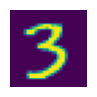

In [6]:
show_image(three_tensors[1])
print(three_tensors[1].shape)

In [7]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

<Axes: >

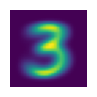

In [8]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

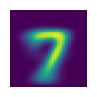

In [9]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

In [10]:
a_3 = stacked_threes[1]
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [11]:
a_7 = stacked_sevens[1]
dist_7_abs = (a_7 - mean7).abs().mean()
dist_7_sqr = ((a_7 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1304), tensor(0.2585))

In [12]:
# torch里有这俩函数。
import torch.nn.functional as F
dist_3_l1 = F.l1_loss(a_3, mean3)
dist_3_l2 = F.mse_loss(a_3, mean3).sqrt()
dist_7_l1 = F.l1_loss(a_7, mean7)
dist_7_l2 = F.mse_loss(a_7, mean7).sqrt()
dist_3_l1,dist_3_l2,dist_7_l1, dist_7_l2

(tensor(0.1114), tensor(0.2021), tensor(0.1304), tensor(0.2585))

In [13]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [14]:
def mnist_distance(a,b):
    return (a-b).abs().mean((-1,-2))

mnist_distance(a_3, mean3), mnist_distance(a_3, mean7)


(tensor(0.1114), tensor(0.1586))

In [15]:
def is_3(x):
    return mnist_distance(x, mean3) < mnist_distance(x, mean7)

is_3(a_3), is_3(a_7)

(tensor(True), tensor(False))

In [16]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1-is_3(valid_7_tens).float()).mean()

accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

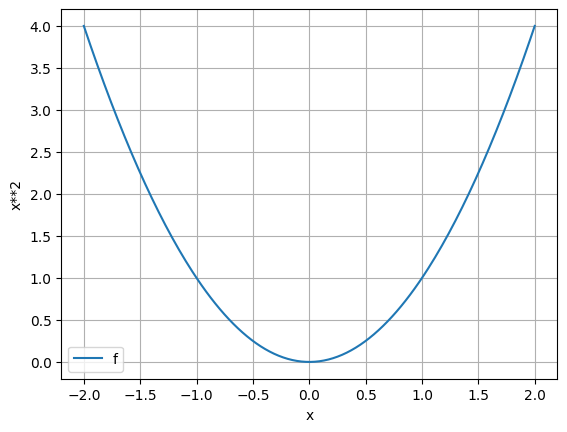

In [17]:
def plot_function(f, xlab='x', ylab='y', title=None, min=-2, max=2):
    xs = torch.linspace(min, max,200)
    ys = f(xs)
    if title:
        plt.title(title)
    plt.plot(xs, ys, label=f.__name__)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.legend()
    plt.grid()
    
def f(x):
    return x**2

plot_function(f, 'x', 'x**2')

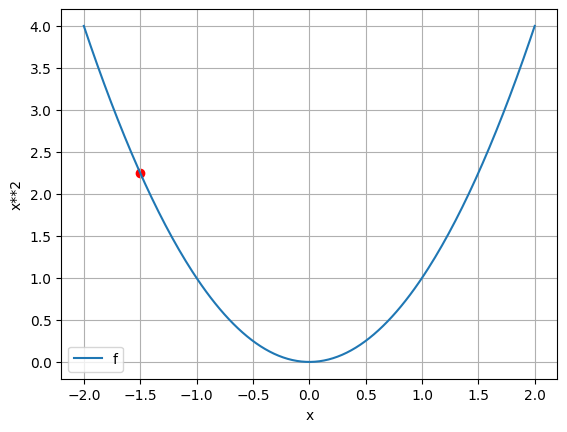

In [18]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red')

## 初识tensor和torch

In [19]:
xt = tensor([3., 4., 5.]).requires_grad_()
def f(x):
    return (x**2).sum()
yt = f(xt)
yt

tensor(50., grad_fn=<SumBackward0>)

In [20]:
yt.backward()
xt.grad

tensor([ 6.,  8., 10.])

In [22]:
time = torch.arange(0,20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

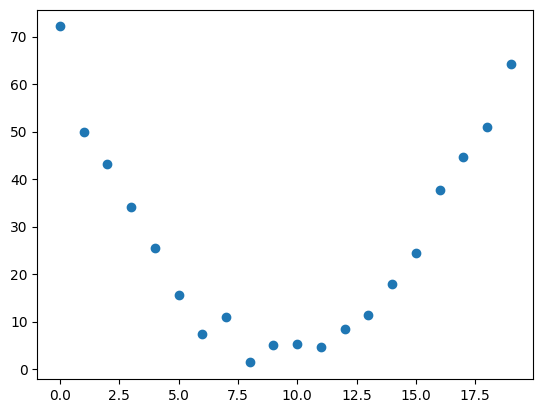

In [23]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed)

In [24]:
def f(t, params):
    a, b, c = params
    return a*t**2 + b*t + c

def mse(preds, targets):
    return ((preds-targets)**2).mean()

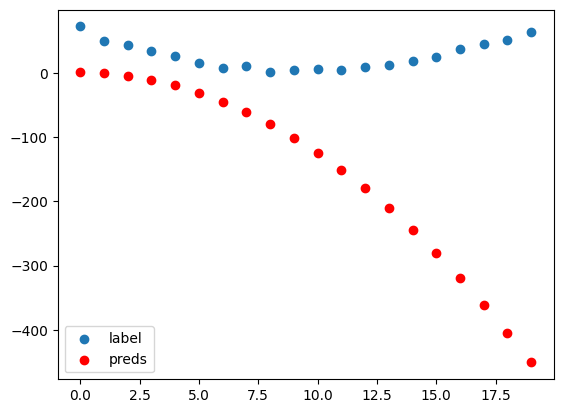

In [59]:
params = torch.randn(3).requires_grad_()
preds = f(time, params)

def show_preds(preds, ax=None):
    if ax is None:
        ax = plt.subplots()[1]
    ax.scatter(time, speed, label='label')
    ax.scatter(time, to_np(preds), color='red', label='preds')
    ax.legend()

show_preds(preds)

In [60]:
loss = mse(preds, speed)
loss

tensor(54724.2695, grad_fn=<MeanBackward0>)

In [47]:
loss.backward()
params.grad * 1e-5

tensor([0.6859, 0.0439, 0.0028])

In [48]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

tensor(8532.2402, grad_fn=<MeanBackward0>)


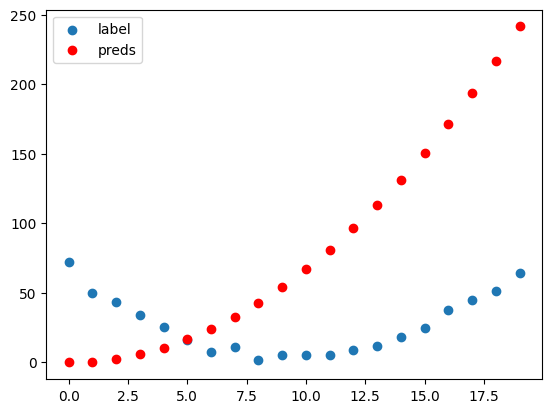

In [49]:
preds = f(time, params)
loss = mse(preds, speed)
print(loss)
show_preds(preds)

In [52]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr*params.grad.data
    params.grad = None
    if prn:
        print(loss.item())
    return preds

for i in range(100):
    apply_step(params, prn=False)


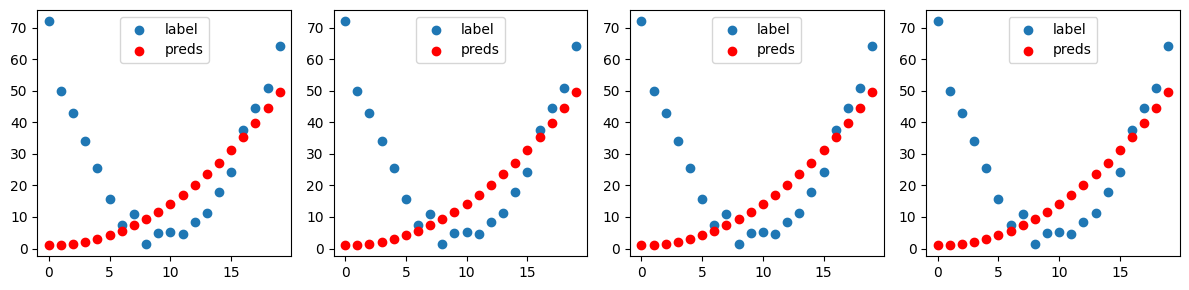

In [86]:
_, axs = plt.subplots(1,4, figsize=(12,3))
for ax in axs:
    show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [87]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [88]:
dset = list(zip(train_x, train_y))

x, y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [89]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)

valid_dset = list(zip(valid_x, valid_y))
x, y = valid_dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [90]:
def init_params(size, std=1.0):
    return (torch.randn(size) * std).requires_grad_()

weights = init_params((28*28, 1))
bias = init_params(1)

weights.shape, bias.shape

(torch.Size([784, 1]), torch.Size([1]))

In [91]:
print(x @ weights + bias)
print((x * weights.T + bias).sum())

tensor([13.3990], grad_fn=<AddBackward0>)
tensor(-1044.1909, grad_fn=<SumBackward0>)


In [92]:
def linear1(xb):
    return xb @ weights + bias
preds = linear1(train_x)
preds.shape

torch.Size([12396, 1])

In [93]:
corrects = (preds > 0.0).float() == train_y
corrects.float().mean().item()

0.4968538284301758

In [95]:
weights.data[0:100] *= -10
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.4909648299217224

In [96]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1 - predictions, predictions).float().mean()

targets = tensor([1,0,1])
preds = tensor([0.9, 0.4, 0.2])

print(torch.where(targets==1, 1-preds, preds))
print(mnist_loss(preds, targets))
      

tensor([0.1000, 0.4000, 0.8000])
tensor(0.4333)


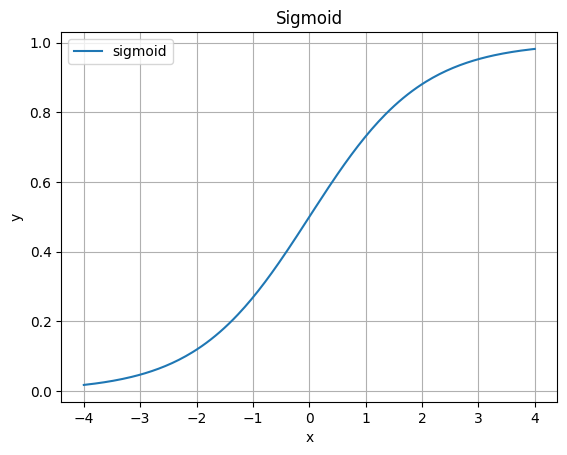

In [97]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [98]:
dl = DataLoader(dset, batch_size=256, shuffle=True)
valid_dl = DataLoader(valid_dset, batch_size=256)

In [99]:
def mnist_loss(preds, labels):
    preds = sigmoid(preds)
    loss = torch.where(labels==1, 1-preds, preds).mean()
    return loss

def linear1(xb):
    return xb @ weights + bias

In [100]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()
    
    
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad * lr
            p.grad.zero_()

In [101]:

def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()


def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

weights = init_params((28*28, 1))
bias = init_params(1)
lr = 1.
params = weights, bias

for _ in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')


0.9065 0.9383 0.9486 0.9554 0.9598 0.9623 0.9638 0.9657 0.9662 0.9677 0.9696 0.9706 0.9706 0.9711 0.9721 0.9721 0.974 0.974 0.9745 0.9745 

In [102]:
linear_model = nn.Linear(28*28, 1)
w, b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [103]:
class BasicOptim:
    def __init__(self, params, lr):
        self.params = list(params)
        self.lr = lr
    
    def step(self, *args, **kwargs):
        for p in self.params:
            p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params:
            p.grad.zero_()
            
opt = BasicOptim(linear_model.parameters(), lr)


In [104]:
def train_epoch(model):
    for xb, yb in dl:
        preds = model(xb)
        loss = mnist_loss(preds, yb)
        loss.backward()
        opt.step()
        opt.zero_grad()

In [105]:
def train_model(model, n_epochs):
    for _ in range(n_epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

train_model(linear_model, 20)

0.9726 0.975 0.977 0.9765 0.977 0.977 0.979 0.9795 0.9785 0.9795 0.9809 0.9814 0.9809 0.9814 0.9819 0.9814 0.9824 0.9814 0.9829 0.9819 

In [106]:
# fastai
linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model,20)

0.9696 0.9755 0.9765 0.9785 0.9785 0.978 0.979 0.979 0.9795 0.9799 0.9795 0.9795 0.9804 0.9809 0.9814 0.9824 0.9824 0.9824 0.9824 0.9824 

In [107]:
dls = DataLoaders(dl, valid_dl)
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [108]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.057521,0.041166,0.970069,00:00
1,0.039743,0.034830,0.975466,00:00
2,0.032095,0.032211,0.973503,00:00
3,0.027673,0.029561,0.976938,00:00
4,0.025561,0.028081,0.978901,00:00
5,0.023886,0.027054,0.978901,00:00
6,0.022508,0.026187,0.978901,00:00
7,0.021424,0.025560,0.978901,00:00
8,0.020987,0.025173,0.979882,00:00
9,0.020105,0.024519,0.979882,00:00


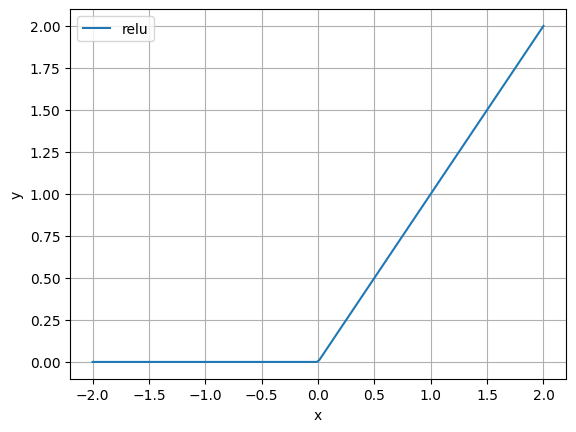

In [109]:
w1 = init_params((28*28, 30))
b1 = init_params(30)
w2 = init_params((30, 1))
b2 = init_params(1)

def simple_net(xb):
    res = xb @ w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

plot_function(F.relu)

In [110]:
simple_net = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30, 1),
)
simple_net

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)

In [111]:
learn = Learner(dls, simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.229313,0.092121,0.965162,00:00
1,0.109266,0.054888,0.968597,00:00
2,0.066778,0.045352,0.969087,00:00
3,0.048719,0.040342,0.970559,00:00
4,0.038858,0.037444,0.971050,00:00
5,0.033697,0.034932,0.972522,00:00
6,0.030956,0.033509,0.973994,00:00
7,0.028615,0.032406,0.974485,00:00
8,0.026712,0.030877,0.975466,00:00
9,0.025217,0.029944,0.976448,00:00


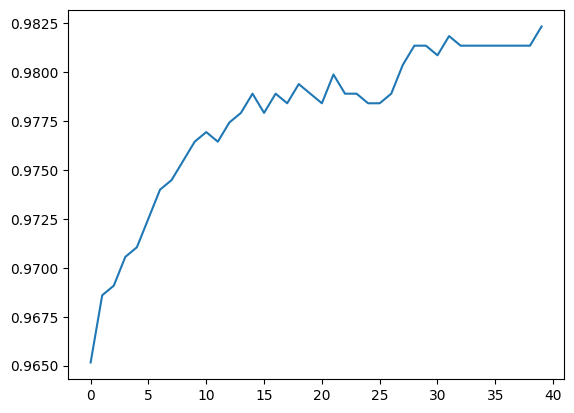

In [112]:
plt.plot(L(learn.recorder.values).itemgot(2))

In [116]:
learn.recorder.values[-1][-1]

0.98233562707901

In [117]:
dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained=False, loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

C:\Users\Admin\anaconda3\envs\hust\Lib\site-packages\fastai\vision\learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,0.183187,0.013921,0.996075,00:47
